In [38]:
# Loading dataset customer reviews with labels
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [39]:
len(reviews)

25000

In [40]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [41]:
labels[0]

'POSITIVE'

In [42]:
from collections import Counter
import numpy as np

In [43]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [44]:
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [45]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [46]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

In [47]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


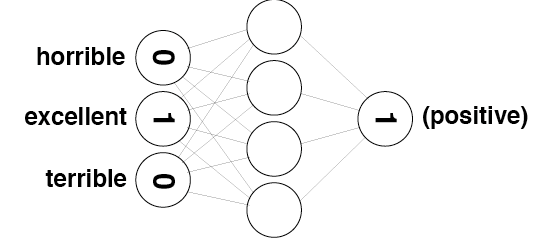

In [48]:
from IPython.display import Image
Image(filename='image.png')

In [49]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        
        np.random.seed(1)

        
        self.pre_process_data(reviews, labels)
        
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes


        self.learning_rate = learning_rate

        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.layer_1 = np.zeros((1,hidden_nodes))
    
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews_raw, training_labels):

        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0

        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))            
            
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):

        correct = 0

        start = time.time()

        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):

        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [50]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])
mlp.train(reviews[:-1000],labels[:-1000])
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%


Progress:0.99% Speed(reviews/sec):621.3 #Correct:136 #Trained:239 Training Accuracy:56.9%

Progress:1.45% Speed(reviews/sec):618.0 #Correct:217 #Trained:349 Training Accuracy:62.1%

Progress:2.39% Speed(reviews/sec):688.5 #Correct:340 #Trained:576 Training Accuracy:59.0%

Progress:2.95% Speed(reviews/sec):699.1 #Correct:432 #Trained:710 Training Accuracy:60.8%

Progress:3.61% Speed(reviews/sec):713.1 #Correct:539 #Trained:869 Training Accuracy:62.0%

Progress:4.26% Speed(reviews/sec):720.8 #Correct:660 #Trained:1024 Training Accuracy:64.4%

Progress:5.09% Speed(reviews/sec):735.2 #Correct:804 #Trained:1223 Training Accuracy:65.7%

Progress:5.67% Speed(reviews/sec):739.3 #Correct:907 #Trained:1363 Training Accuracy:66.5%

Progress:6.39% Speed(reviews/sec):750.4 #Correct:1042 #Trained:1535 Training Accuracy:67.8%

Progress:7.16% Speed(reviews/sec):759.6 #Correct:1176 #Trained:1721 Training Accuracy:68.3%

Progress:8.06% Speed(reviews/sec):772.1 #Correct:1341 #Trained:1936 Training Accuracy:69.2%

Progress:8.7% Speed(reviews/sec):777.3 #Correct:1467 #Trained:2089 Training Accuracy:70.2%

Progress:9.51% Speed(reviews/sec):777.8 #Correct:1629 #Trained:2284 Training Accuracy:71.3%

Progress:10.2% Speed(reviews/sec):777.5 #Correct:1768 #Trained:2459 Training Accuracy:71.8%

Progress:10.4% Speed(reviews/sec):776.3 #Correct:1802 #Trained:2501 Training Accuracy:72.0%


Progress:11.3% Speed(reviews/sec):774.2 #Correct:1999 #Trained:2731 Training Accuracy:73.1%

Progress:12.0% Speed(reviews/sec):773.7 #Correct:2135 #Trained:2891 Training Accuracy:73.8%

Progress:12.6% Speed(reviews/sec):774.8 #Correct:2254 #Trained:3047 Training Accuracy:73.9%

Progress:13.3% Speed(reviews/sec):773.7 #Correct:2373 #Trained:3200 Training Accuracy:74.1%

Progress:13.9% Speed(reviews/sec):774.4 #Correct:2478 #Trained:3347 Training Accuracy:74.0%

Progress:14.6% Speed(reviews/sec):772.5 #Correct:2606 #Trained:3511 Training Accuracy:74.2%

Progress:15.3% Speed(reviews/sec):774.8 #Correct:2746 #Trained:3688 Training Accuracy:74.4%

Progress:16.1% Speed(reviews/sec):775.3 #Correct:2894 #Trained:3877 Training Accuracy:74.6%

Progress:17.1% Speed(reviews/sec):779.2 #Correct:3074 #Trained:4105 Training Accuracy:74.8%

Progress:17.7% Speed(reviews/sec):779.9 #Correct:3200 #Trained:4265 Training Accuracy:75.0%

Progress:18.4% Speed(reviews/sec):780.6 #Correct:3336 #Trained:4434 Training Accuracy:75.2%

Progress:19.1% Speed(reviews/sec):782.0 #Correct:3456 #Trained:4591 Training Accuracy:75.2%

Progress:20.1% Speed(reviews/sec):779.8 #Correct:3655 #Trained:4837 Training Accuracy:75.5%

Progress:20.6% Speed(reviews/sec):775.8 #Correct:3753 #Trained:4965 Training Accuracy:75.5%

Progress:20.8% Speed(reviews/sec):776.8 #Correct:3782 #Trained:5001 Training Accuracy:75.6%


Progress:22.0% Speed(reviews/sec):778.1 #Correct:4032 #Trained:5295 Training Accuracy:76.1%

Progress:22.6% Speed(reviews/sec):777.7 #Correct:4146 #Trained:5439 Training Accuracy:76.2%

Progress:23.2% Speed(reviews/sec):778.4 #Correct:4271 #Trained:5589 Training Accuracy:76.4%

Progress:24.0% Speed(reviews/sec):779.2 #Correct:4431 #Trained:5777 Training Accuracy:76.7%

Progress:24.7% Speed(reviews/sec):779.4 #Correct:4555 #Trained:5935 Training Accuracy:76.7%

Progress:25.3% Speed(reviews/sec):778.7 #Correct:4668 #Trained:6076 Training Accuracy:76.8%

Progress:26.1% Speed(reviews/sec):778.5 #Correct:4839 #Trained:6265 Training Accuracy:77.2%

Progress:27.0% Speed(reviews/sec):781.2 #Correct:5029 #Trained:6486 Training Accuracy:77.5%

Progress:27.6% Speed(reviews/sec):781.6 #Correct:5159 #Trained:6637 Training Accuracy:77.7%

Progress:28.5% Speed(reviews/sec):780.8 #Correct:5335 #Trained:6854 Training Accuracy:77.8%

Progress:29.3% Speed(reviews/sec):781.5 #Correct:5496 #Trained:7038 Training Accuracy:78.0%

Progress:30.3% Speed(reviews/sec):781.3 #Correct:5704 #Trained:7289 Training Accuracy:78.2%

Progress:31.1% Speed(reviews/sec):782.2 #Correct:5867 #Trained:7485 Training Accuracy:78.3%

Progress:31.2% Speed(reviews/sec):782.3 #Correct:5881 #Trained:7501 Training Accuracy:78.4%


Progress:32.6% Speed(reviews/sec):784.8 #Correct:6165 #Trained:7828 Training Accuracy:78.7%

Progress:33.2% Speed(reviews/sec):783.3 #Correct:6291 #Trained:7975 Training Accuracy:78.8%

Progress:33.9% Speed(reviews/sec):784.5 #Correct:6436 #Trained:8146 Training Accuracy:79.0%

Progress:34.6% Speed(reviews/sec):784.6 #Correct:6575 #Trained:8312 Training Accuracy:79.1%

Progress:35.3% Speed(reviews/sec):785.1 #Correct:6718 #Trained:8481 Training Accuracy:79.2%

Progress:36.0% Speed(reviews/sec):786.2 #Correct:6854 #Trained:8642 Training Accuracy:79.3%

Progress:36.6% Speed(reviews/sec):786.3 #Correct:6985 #Trained:8790 Training Accuracy:79.4%

Progress:37.2% Speed(reviews/sec):785.6 #Correct:7113 #Trained:8937 Training Accuracy:79.5%

Progress:37.9% Speed(reviews/sec):786.0 #Correct:7263 #Trained:9102 Training Accuracy:79.7%

Progress:38.6% Speed(reviews/sec):786.6 #Correct:7415 #Trained:9265 Training Accuracy:80.0%

Progress:39.3% Speed(reviews/sec):787.6 #Correct:7554 #Trained:9434 Training Accuracy:80.0%

Progress:40.0% Speed(reviews/sec):788.1 #Correct:7711 #Trained:9614 Training Accuracy:80.2%

Progress:40.6% Speed(reviews/sec):787.7 #Correct:7842 #Trained:9760 Training Accuracy:80.3%

Progress:41.3% Speed(reviews/sec):787.8 #Correct:7980 #Trained:9928 Training Accuracy:80.3%

Progress:41.6% Speed(reviews/sec):787.4 #Correct:8044 #Trained:10001 Training Accuracy:80.4%


Progress:42.5% Speed(reviews/sec):787.4 #Correct:8232 #Trained:10223 Training Accuracy:80.5%

Progress:43.3% Speed(reviews/sec):787.0 #Correct:8387 #Trained:10406 Training Accuracy:80.5%

Progress:43.9% Speed(reviews/sec):786.3 #Correct:8516 #Trained:10555 Training Accuracy:80.6%

Progress:44.5% Speed(reviews/sec):785.0 #Correct:8624 #Trained:10682 Training Accuracy:80.7%

Progress:45.2% Speed(reviews/sec):785.1 #Correct:8769 #Trained:10857 Training Accuracy:80.7%

Progress:45.7% Speed(reviews/sec):783.9 #Correct:8879 #Trained:10987 Training Accuracy:80.8%

Progress:46.5% Speed(reviews/sec):785.5 #Correct:9035 #Trained:11165 Training Accuracy:80.9%

Progress:46.9% Speed(reviews/sec):782.6 #Correct:9130 #Trained:11275 Training Accuracy:80.9%

Progress:47.4% Speed(reviews/sec):781.2 #Correct:9222 #Trained:11397 Training Accuracy:80.9%

Progress:48.0% Speed(reviews/sec):780.5 #Correct:9341 #Trained:11533 Training Accuracy:80.9%

Progress:48.5% Speed(reviews/sec):778.2 #Correct:9446 #Trained:11658 Training Accuracy:81.0%

Progress:49.0% Speed(reviews/sec):775.5 #Correct:9539 #Trained:11768 Training Accuracy:81.0%

Progress:49.5% Speed(reviews/sec):773.5 #Correct:9647 #Trained:11896 Training Accuracy:81.0%

Progress:50.2% Speed(reviews/sec):774.3 #Correct:9789 #Trained:12052 Training Accuracy:81.2%

Progress:50.7% Speed(reviews/sec):773.8 #Correct:9899 #Trained:12183 Training Accuracy:81.2%

Progress:51.4% Speed(reviews/sec):774.7 #Correct:10037 #Trained:12346 Training Accuracy:81.2%

Progress:52.0% Speed(reviews/sec):774.4 #Correct:10169 #Trained:12499 Training Accuracy:81.3%

Progress:52.0% Speed(reviews/sec):774.2 #Correct:10171 #Trained:12501 Training Accuracy:81.3%


Progress:53.1% Speed(reviews/sec):772.1 #Correct:10391 #Trained:12752 Training Accuracy:81.4%

Progress:53.7% Speed(reviews/sec):772.0 #Correct:10511 #Trained:12892 Training Accuracy:81.5%

Progress:54.5% Speed(reviews/sec):771.9 #Correct:10691 #Trained:13096 Training Accuracy:81.6%

Progress:55.7% Speed(reviews/sec):774.7 #Correct:10921 #Trained:13379 Training Accuracy:81.6%

Progress:56.4% Speed(reviews/sec):773.9 #Correct:11066 #Trained:13537 Training Accuracy:81.7%

Progress:57.2% Speed(reviews/sec):774.3 #Correct:11230 #Trained:13737 Training Accuracy:81.7%

Progress:58.0% Speed(reviews/sec):774.9 #Correct:11398 #Trained:13923 Training Accuracy:81.8%

Progress:58.6% Speed(reviews/sec):775.3 #Correct:11524 #Trained:14075 Training Accuracy:81.8%

Progress:59.3% Speed(reviews/sec):775.7 #Correct:11656 #Trained:14244 Training Accuracy:81.8%

Progress:60.0% Speed(reviews/sec):776.4 #Correct:11793 #Trained:14408 Training Accuracy:81.8%

Progress:61.2% Speed(reviews/sec):777.8 #Correct:12041 #Trained:14707 Training Accuracy:81.8%

Progress:62.1% Speed(reviews/sec):777.3 #Correct:12226 #Trained:14917 Training Accuracy:81.9%

Progress:62.5% Speed(reviews/sec):777.2 #Correct:12299 #Trained:15001 Training Accuracy:81.9%


Progress:63.4% Speed(reviews/sec):776.4 #Correct:12486 #Trained:15229 Training Accuracy:81.9%

Progress:64.1% Speed(reviews/sec):776.4 #Correct:12626 #Trained:15390 Training Accuracy:82.0%

Progress:64.8% Speed(reviews/sec):776.1 #Correct:12773 #Trained:15553 Training Accuracy:82.1%

Progress:65.5% Speed(reviews/sec):777.0 #Correct:12915 #Trained:15725 Training Accuracy:82.1%

Progress:66.3% Speed(reviews/sec):777.4 #Correct:13077 #Trained:15913 Training Accuracy:82.1%

Progress:67.0% Speed(reviews/sec):777.5 #Correct:13206 #Trained:16082 Training Accuracy:82.1%

Progress:67.7% Speed(reviews/sec):777.3 #Correct:13370 #Trained:16265 Training Accuracy:82.2%

Progress:68.5% Speed(reviews/sec):778.0 #Correct:13522 #Trained:16452 Training Accuracy:82.1%

Progress:69.2% Speed(reviews/sec):777.3 #Correct:13664 #Trained:16616 Training Accuracy:82.2%

Progress:70.0% Speed(reviews/sec):777.6 #Correct:13830 #Trained:16813 Training Accuracy:82.2%

Progress:70.5% Speed(reviews/sec):775.1 #Correct:13923 #Trained:16924 Training Accuracy:82.2%

Progress:70.8% Speed(reviews/sec):771.6 #Correct:14002 #Trained:17015 Training Accuracy:82.2%

Progress:71.3% Speed(reviews/sec):766.6 #Correct:14097 #Trained:17125 Training Accuracy:82.3%

Progress:71.8% Speed(reviews/sec):761.7 #Correct:14194 #Trained:17236 Training Accuracy:82.3%

Progress:72.9% Speed(reviews/sec):748.3 #Correct:14419 #Trained:17501 Training Accuracy:82.3%
Progress:83.3% Speed(reviews/sec):676.7 #Correct:16599 #Trained:20001 Training Accuracy:82.9%
Progress:93.7% Speed(reviews/sec):630.7 #Correct:18791 #Trained:22501 Training Accuracy:83.5%
Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%uracy:83.8%
Progress:10.4% Speed(reviews/sec):472.7 #Correct:2247 #Trained:2501 Training Accuracy:89.8%
Progress:20.8% Speed(reviews/sec):486.6 #Correct:4488 #Trained:5001 Training Accuracy:89.7%
Progress:31.2% Speed(reviews/sec):492.0 #Correct:6724 #Trained:7501 Training Accuracy:89.6%
Progress:41.6% Speed(reviews/sec):540.3 #Correct:8988 #Trained:10001 Training Accuracy:89.8%
Progress:52.0% Speed(reviews/sec):578.5 #Correct:11249 #Trained:12501 Training Accuracy:89.9%
Progress:62.5% Speed(reviews/sec):609.1 #Correct:13500 #Trained:15001 Training Accuracy:89.9%
Progress:72.9% Speed(reviews/sec):631.3 #Correct:15745 #Trained:175

In [51]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:10.9% Speed(reviews/sec):516.5 #Correct:98 #Tested:110 Testing Accuracy:89.0%

Progress:25.4% Speed(reviews/sec):568.1 #Correct:229 #Tested:255 Testing Accuracy:89.8%

Progress:48.3% Speed(reviews/sec):596.2 #Correct:429 #Tested:484 Testing Accuracy:88.6%

Progress:62.5% Speed(reviews/sec):584.0 #Correct:545 #Tested:626 Testing Accuracy:87.0%

Progress:78.4% Speed(reviews/sec):597.0 #Correct:665 #Tested:785 Testing Accuracy:84.7%

Progress:91.7% Speed(reviews/sec):598.9 #Correct:778 #Tested:918 Testing Accuracy:84.7%

Progress:99.9% Speed(reviews/sec):614.7 #Correct:849 #Tested:1000 Testing Accuracy:84.9%

In [58]:

a=['this teachers are not good , and also course is also worst']
b=['NEGATIVE']
display(a)
mlp.test(a,b)

['this teachers are not good , and also course is also worst']

Progress:0.0% Speed(reviews/sec):0 #Correct:1 #Tested:1 Testing Accuracy:100.%